In [1]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def send_cmd(ser, cmd):
    """Send a command and wait a bit"""
    ser.write((cmd + '\r').encode())
    time.sleep(0.1)

def query(ser, cmd):
    """Send a command and read the response"""
    send_cmd(ser, cmd)
    return ser.readline().decode().strip()

In [6]:
# Open serial connection
ser = serial.Serial(
    port='COM5',         # Replace with your actual port
    baudrate=9600,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    timeout=2,
    xonxoff=False,
    rtscts=False,
    dsrdtr=False
)


def init_cmds(ser):
    # Reset and configure instrument
    print(query(ser, '*IDN?'))
    send_cmd(ser, '*RST')
    send_cmd(ser, ':FORM:ELEM READ')
    send_cmd(ser, 'TRIG:DEL 0')
    send_cmd(ser, 'TRIG:COUNT 1')
    send_cmd(ser, 'SENS:CURR:NPLC 6')
    send_cmd(ser, 'SENS:CURR:RANG 0.000002')
    send_cmd(ser, 'SENS:CURR:RANG:AUTO ON')
    send_cmd(ser, 'SYST:AZER:STAT OFF')
    send_cmd(ser, 'DISP:ENAB ON')
    send_cmd(ser, ':SYST:ZCH:STAT OFF')

    # Wait for settings to take effect
    time.sleep(0.5)

init_cmds(ser)


#417 reads/min with no time.sleep
read_time = .5 # time in minutes to read for
num_of_reads = round(417*read_time)
readings = np.zeros(num_of_reads)

# Trigger a read and fetch result
for i in range(num_of_reads):
    time.sleep(0.001)
    current = query(ser, 'READ?')
    readings[i] = current




# Optional: close serial port when done
ser.close()


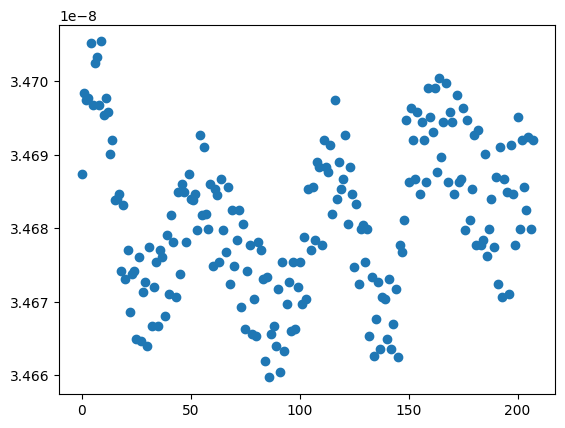

In [7]:
plt.scatter(range(num_of_reads), readings)
plt.show()

In [89]:
print(f"mean over {read_time} mins: {np.mean(readings)}")
print(f"std over {read_time} mins: {np.std(readings)}")

4.052769038461539e-08
